# Notebook Analyse

## Opdracht A: CO2 emissies, GDP en hernieuwbare energie

## Groep: Andre & Andries Jan

## Deliverables

De volgende zaken horen te worden opgeleverd:
1. Een Jupyter Notebook met je analyse code
    - inladen van data, preprocessing
    * verrijken van data (dmv merging/joining met andere dataset)
    * visualisaties
    * beargumentering en conclusies.
2. De gebruikte datasets
3. Een korte presentatie waarin je je project en bevindingen presenteert. 
    * Laat ook zien wat je van deze opdracht hebt geleerd
    * welke obstakels je bent tegengekomen
    * eventueel welke nieuwe Python libraries en technieken je hebt gebruikt en waarvoor

## Gebruikte datasets

- Renewable energy consumption: https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS 
- GDP per capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.KD 
- CO2 emissions: https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

## Importeren van packages

In [1]:
#Import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from pandas_datareader import wb

## Vraag 1: Welke landen laten de sterkste stijgende trend zien in CO2 emissies? En welke landen juist een dalende?

### Laden en bewerken van de data

In [2]:
#Download co2 data from the World Bank API into a dataframe

co2_wb = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    #CO2 emission (kilotonnes)
                    indicator='EN.ATM.CO2E.KT',
                    #Use the country attribute to identify the countries you want data for
                    country=['all'],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='2010',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2014
                )
co2_wb.index
co2_wb = co2_wb.reset_index(level=['year'])
co2_wb.columns = ['year','emission']
co2_wb['year'] = pd.to_numeric(co2_wb['year'])

#Show the head of the dataframe 
co2_wb.head()

year      emission
country                       
Arab World  2014  1.895700e+06
Arab World  2013  1.775096e+06
Arab World  2012  1.796962e+06
Arab World  2011  1.655808e+06
Arab World  2010  1.645559e+06

In [3]:
# Verspreid waarden kolom 'year' over 5 kolommen zodat je kunt vergelijken
co2_wb1 = co2_wb.pivot(columns = 'year', values = 'emission')
co2_wb1.head(25)

year                        2010         2011         2012         2013  \
country                                                                   
Afghanistan             8463.436    12240.446    10755.311    10014.577   
Albania                 4598.418     5240.143     4910.113     5064.127   
Algeria               119177.500   121187.016   129987.816   134465.223   
American Samoa               NaN          NaN          NaN          NaN   
Andorra                  517.047      491.378      487.711      476.710   
Angola                 29057.308    30340.758    33399.036    32617.965   
Antigua and Barbuda      524.381      513.380      524.381      524.381   
Arab World           1645558.916  1655808.181  1796962.012  1775095.691   
Argentina             187919.082   191633.753   192356.152   189851.591   
Armenia                 4217.050     4917.447     5694.851     5496.833   
Aruba                   2508.228     2500.894     1349.456      861.745   
Australia             390861.863   391818.950   388126.281   372266.506   
Austria                67502.136    65019.577    62272.994    62485.680   
Azerbaijan             30678.122    33446.707    35555.232    35643.240   
Bahamas, The            1653.817     1866.503     1969.179     2801.588   
Bahrain                29266.327    28650.271    26673.758    31312.513   
Bangladesh             59937.115    63413.431    67505.803    69709.670   
Barbados                1477.801     1529.139     1470.467     1448.465   
Belarus                63043.064    64062.490    63222.747    63769.130   
Belgium               110824.074    99944.085    95107.312    96970.148   
Belize                   539.049      601.388      476.710      513.380   
Benin                   5089.796     5295.148     5471.164     5812.195   
Bermuda                  608.722      443.707      476.710      458.375   
Bhutan                   487.711      733.400      817.741      920.417   
Bolivia                15203.382    16145.801    18793.375    18918.053   

year                         2014  
country                            
Afghanistan          9.809225e+03  
Albania              5.716853e+03  
Algeria              1.454002e+05  
American Samoa                NaN  
Andorra              4.620420e+02  
Angola               3.476316e+04  
Antigua and Barbuda  5.317150e+02  
Arab World           1.895700e+06  
Argentina            2.040245e+05  
Armenia              5.529836e+03  
Aruba                8.727460e+02  
Australia            3.612618e+05  
Austria              5.871234e+04  
Azerbaijan           3.748774e+04  
Bahamas, The         2.416553e+03  
Bahrain              3.133818e+04  
Bangladesh           7.318965e+04  
Barbados             1.272449e+03  
Belarus              6.349777e+04  
Belgium              9.335082e+04  
Belize               4.950450e+02  
Benin                6.318241e+03  
Bermuda              5.757190e+02  
Bhutan               1.001091e+03  
Bolivia              2.041052e+04

In [4]:
# Formule om procentuele verandering van 2010 -2014 weer te geven (nieuw - oud / oud * 100)
co2_wb1['change(%)'] = ((co2_wb1.iloc[:,4] - co2_wb1.iloc[:,0]) / co2_wb1.iloc[:,0]) * 100 
co2_wb1.head()

year                  2010        2011        2012        2013        2014  \
country                                                                      
Afghanistan       8463.436   12240.446   10755.311   10014.577    9809.225   
Albania           4598.418    5240.143    4910.113    5064.127    5716.853   
Algeria         119177.500  121187.016  129987.816  134465.223  145400.217   
American Samoa         NaN         NaN         NaN         NaN         NaN   
Andorra            517.047     491.378     487.711     476.710     462.042   

year            change(%)  
country                    
Afghanistan     15.901213  
Albania         24.322169  
Algeria         22.003077  
American Samoa        NaN  
Andorra        -10.638298

In [5]:
# Sorteer kolom 'change(%)' van hoog naar laag'
co2_wb1 = co2_wb1.sort_values('change(%)', ascending=False)
co2_wb1.head()

year                  2010      2011      2012      2013      2014   change(%)
country                                                                       
Mozambique        2735.582  3223.293  3120.617  4019.032  8426.766  208.042895
Congo, Dem. Rep.  2020.517  2493.560  2401.885  3589.993  4671.758  131.215971
Burundi            212.686   242.022   282.359   289.693   440.040  106.896552
Bhutan             487.711   733.400   817.741   920.417  1001.091  105.263158
Tajikistan        2544.898  2350.547  2933.600  3479.983  5188.805  103.890490

### Visualisatie co2 trend door barplot

In [6]:
# Selecteer 10 grootse stijgers uit DataFrame dmv. iloc
stijgers =co2_wb1.iloc[0:10, 5:6]

# Maak van de index een kolom met de landennamen
stijgers = stijgers.reset_index()

# Verander de kolom met landennamen van string naar category zodat je er een categorische plot van kunt maken
stijgers['country'] = stijgers['country'].astype('category')
stijgers.info()
stijgers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
country      10 non-null category
change(%)    10 non-null float64
dtypes: category(1), float64(1)
memory usage: 570.0 bytes


year           country   change(%)
0           Mozambique  208.042895
1     Congo, Dem. Rep.  131.215971
2              Burundi  106.896552
3               Bhutan  105.263158
4           Tajikistan  103.890490
5          Timor-Leste  100.000000
6                Niger   81.250000
7         Sierra Leone   80.303030
8             Ethiopia   76.113586
9              Myanmar   72.839144

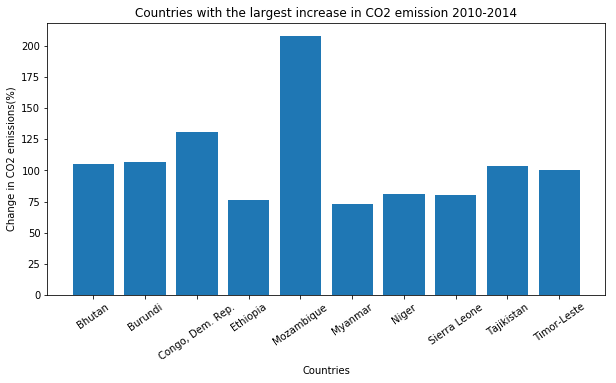

In [7]:
# Maak barplot
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.bar(stijgers.country, stijgers['change(%)'])
ax.set_xlabel('Countries')
ax.set_ylabel('Change in CO2 emissions(%)')
ax.set_title('Countries with the largest increase in CO2 emission 2010-2014')
plt.xticks(rotation=35)
plt.show()

In [8]:
# Sorteer kolom 'change(%)' van laag naar hoog'
co2_wb2 = co2_wb1.sort_values('change(%)', ascending=True)
co2_wb2.head()

year                             2010        2011        2012        2013  \
country                                                                     
Aruba                        2508.228    2500.894    1349.456     861.745   
Syrian Arab Republic        61605.600   56908.173   44730.066   36438.979   
Korea, Dem. People’s Rep.   66453.374   48034.033   49057.126   36009.940   
Denmark                     46640.573   40645.028   36427.978   38532.836   
Ukraine                    304643.359  286392.700  295791.221  271875.047   

year                             2014  change(%)  
country                                           
Aruba                         872.746 -65.204678  
Syrian Arab Republic        30703.791 -50.160714  
Korea, Dem. People’s Rep.   40527.684 -39.013354  
Denmark                     33498.045 -28.178316  
Ukraine                    227298.995 -25.388495

In [9]:
# Selecteer 10 grootse dalers uit DataFrame dmv. iloc
dalers =co2_wb2.iloc[0:10, 5:6]

# Maak van de index een kolom met de landennamen
dalers = dalers.reset_index()

# Verander de kolom met landennamen van string naar category zodat je er een categorische plot van kunt maken
dalers['country'] = dalers['country'].astype('category')
dalers.info()
dalers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
country      10 non-null category
change(%)    10 non-null float64
dtypes: category(1), float64(1)
memory usage: 570.0 bytes


year                    country  change(%)
0                         Aruba -65.204678
1          Syrian Arab Republic -50.160714
2     Korea, Dem. People’s Rep. -39.013354
3                       Denmark -28.178316
4                       Ukraine -25.388495
5                       Finland -23.809805
6                     Greenland -23.756906
7                        Cyprus -21.360609
8                         Italy -20.956551
9                        Norway -20.761393

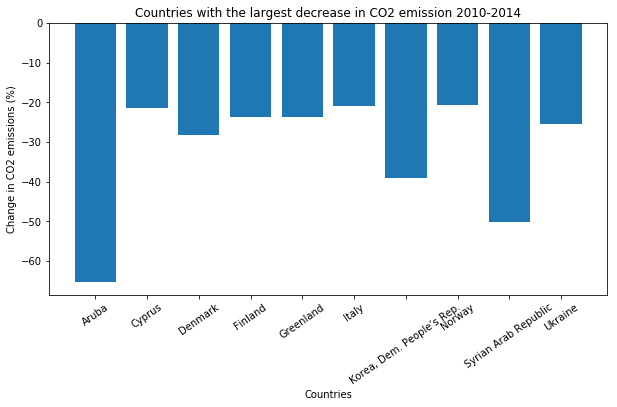

In [10]:
# Maak barplot
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.bar(dalers.country, dalers['change(%)'])
ax.set_xlabel('Countries')
ax.set_ylabel('Change in CO2 emissions (%)')
ax.set_title('Countries with the largest decrease in CO2 emission 2010-2014')
plt.xticks(rotation=35)
plt.show()

### Antwoord: 
- De top 5 landen met de sterkst stijgende trend in CO2 emissies in de periode 2010-2014 zijn: Mozambique, Congo, Burundi, Bhutan, Tajikistan
- De top 5 landen met de sterkst dalende trend in CO2 emissies in de periode 2010-2014 zijn: Aruba, Syrie, Noord-Korea, Denemarken, Ukraine

## Vraag 2: Kun je (dmv visualisatie) een verband ontdekken tussen CO2 emissies en GDP?

### Laden en preprocessing van datasets

In [11]:
# Download GDP per capita from WB API into DataFrame df2

gdp_wb = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    #gdp per capita 
                    indicator='NY.GDP.PCAP.KD',
                    #Use the country attribute to identify the countries you want data for
                    country=['all'],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='2010',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2014
                )

gdp_wb.head()

NY.GDP.PCAP.KD
country    year                
Arab World 2014     6285.526673
           2013     6240.652870
           2012     6154.626590
           2011     5986.821219
           2010     5917.574308

In [12]:
# Make column from index level 'year'
gdp_wb = gdp_wb.reset_index(level=['year'])

# Rename columns and set correct datatype
gdp_wb.columns = ['year','gdp_per_cap']
gdp_wb['year'] = pd.to_numeric(gdp_wb['year'])

#Show the head of the dataframe 

gdp_wb.head(10)

year  gdp_per_cap
country                                  
Arab World              2014  6285.526673
Arab World              2013  6240.652870
Arab World              2012  6154.626590
Arab World              2011  5986.821219
Arab World              2010  5917.574308
Caribbean small states  2014  8877.668074
Caribbean small states  2013  8903.240828
Caribbean small states  2012  8822.045233
Caribbean small states  2011  8766.849448
Caribbean small states  2010  8726.326154

In [13]:
# Verspreid waarden kolom 'year' over 5 kolommen zodat je kunt vergelijken
gdp_wb1 = gdp_wb.pivot(columns= 'year', values = 'gdp_per_cap')
gdp_wb1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
2010    249 non-null float64
2011    245 non-null float64
2012    243 non-null float64
2013    243 non-null float64
2014    242 non-null float64
dtypes: float64(5)
memory usage: 12.4+ KB


In [14]:
# Maak een nieuw dataframe van GDP en uitstoot in 2014 dmv 'concatenation' 
df_co2_gdp = pd.concat([gdp_wb1.iloc[:, 4], co2_wb1.iloc[:, 4]], axis=1)
df_co2_gdp.columns = ['gdp_2014', 'co2_emission_2014']
df_co2_gdp.head()

gdp_2014  co2_emission_2014
Afghanistan       630.320014           9809.225
Albania          4413.561583           5716.853
Algeria          4675.885024         145400.217
American Samoa   9779.883487                NaN
Andorra         40785.049228            462.042

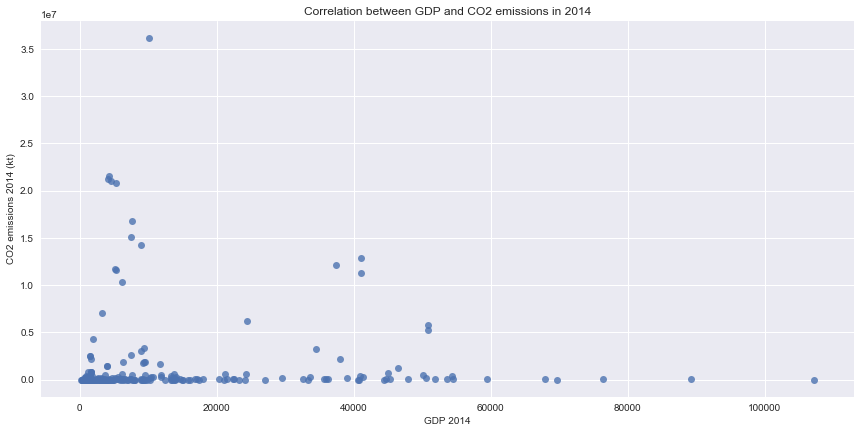

In [15]:
#Grafiek genereren
sns.set(rc={"font.size":8,"axes.labelsize":10})
p = sns.lmplot(x='gdp_2014', y='co2_emission_2014', fit_reg= False, data=df_co2_gdp, size=6, aspect = 2)
p = (p.set_axis_labels('GDP 2014', 'CO2 emissions 2014 (kt)'))
plt.title('Correlation between GDP and CO2 emissions in 2014')

plt.show()

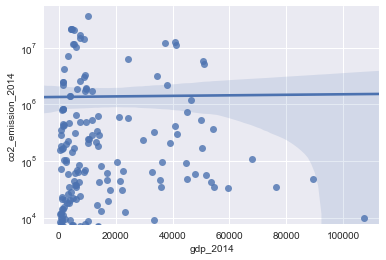

In [16]:
# Inzoomen
ax = sns.regplot(x='gdp_2014', y='co2_emission_2014', data=df_co2_gdp)
ax.set_yscale('log')

plt.show()

In [17]:
# Correlatie
df_co2_gdp['gdp_2014'].corr(df_co2_gdp['co2_emission_2014'])

0.006322167357014034

### Antwoord: 
- Er is geen duidelijk verband tussen CO2 emissies en GDP in 2014

## (Vraag 2 Optioneel)
- Analyse van verband tussen CO2 emissies en GDP, onderverdeeld in inkomensgroepen

### Voeg inkomensgroep en regio toe aan dataframe

In [18]:
# Laad lokaal bestand in dataframe (lukte niet via API)
# Beschikbaar via https://datacatalog.worldbank.org/dataset/world-development-indicators
wdifile = 'C:/Users/ajeez/python_projects/WDICountry.csv'

data = pd.read_csv(wdifile)

In [19]:
# Slice dataframe columns
data_regional = data.loc[:,['Short Name','Region','Income Group']]
data_regional.columns = ['country', 'region', 'income_group']
data_regional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
country         263 non-null object
region          217 non-null object
income_group    217 non-null object
dtypes: object(3)
memory usage: 6.2+ KB


In [20]:
# Check of columns overeenkomen
df_co2_gdp.head()
data_regional.head()

country                     region         income_group
0        Aruba  Latin America & Caribbean          High income
1  Afghanistan                 South Asia           Low income
2       Angola         Sub-Saharan Africa  Lower middle income
3      Albania      Europe & Central Asia  Upper middle income
4      Andorra      Europe & Central Asia          High income

In [21]:
# Make column from index 
df_co2_gdp = df_co2_gdp.reset_index()
df_co2_gdp.rename(columns={'index':'country'}, inplace=True)
df_co2_gdp.head()

country      gdp_2014  co2_emission_2014
0     Afghanistan    630.320014           9809.225
1         Albania   4413.561583           5716.853
2         Algeria   4675.885024         145400.217
3  American Samoa   9779.883487                NaN
4         Andorra  40785.049228            462.042

In [22]:
# Merge dataframes 
df_co2_income = pd.merge(data_regional, df_co2_gdp)
df_co2_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 5 columns):
country              240 non-null object
region               199 non-null object
income_group         199 non-null object
gdp_2014             221 non-null float64
co2_emission_2014    229 non-null float64
dtypes: float64(2), object(3)
memory usage: 11.2+ KB


In [23]:
# Add 'change(%)' column with merge operation
co2_wb1 = co2_wb1.reset_index()
df_co21 = pd.merge(df_co2_income, co2_wb1)
df_co21.head()

country                     region         income_group      gdp_2014  \
0        Aruba  Latin America & Caribbean          High income           NaN   
1  Afghanistan                 South Asia           Low income    630.320014   
2       Angola         Sub-Saharan Africa  Lower middle income   3747.568360   
3      Albania      Europe & Central Asia  Upper middle income   4413.561583   
4      Andorra      Europe & Central Asia          High income  40785.049228   

   co2_emission_2014       2010       2011       2012       2013       2014  \
0            872.746   2508.228   2500.894   1349.456    861.745    872.746   
1           9809.225   8463.436  12240.446  10755.311  10014.577   9809.225   
2          34763.160  29057.308  30340.758  33399.036  32617.965  34763.160   
3           5716.853   4598.418   5240.143   4910.113   5064.127   5716.853   
4            462.042    517.047    491.378    487.711    476.710    462.042   

   change(%)  
0 -65.204678  
1  15.901213  
2  19.636547  
3  24.322169  
4 -10.638298

In [24]:
# Drop unneeded columns
df_co21 = df_co21.drop(columns=[2010, 2011, 2012, 2013, 2014])
df_co21.head()

country                     region         income_group      gdp_2014  \
0        Aruba  Latin America & Caribbean          High income           NaN   
1  Afghanistan                 South Asia           Low income    630.320014   
2       Angola         Sub-Saharan Africa  Lower middle income   3747.568360   
3      Albania      Europe & Central Asia  Upper middle income   4413.561583   
4      Andorra      Europe & Central Asia          High income  40785.049228   

   co2_emission_2014  change(%)  
0            872.746 -65.204678  
1           9809.225  15.901213  
2          34763.160  19.636547  
3           5716.853  24.322169  
4            462.042 -10.638298

### Grafiek

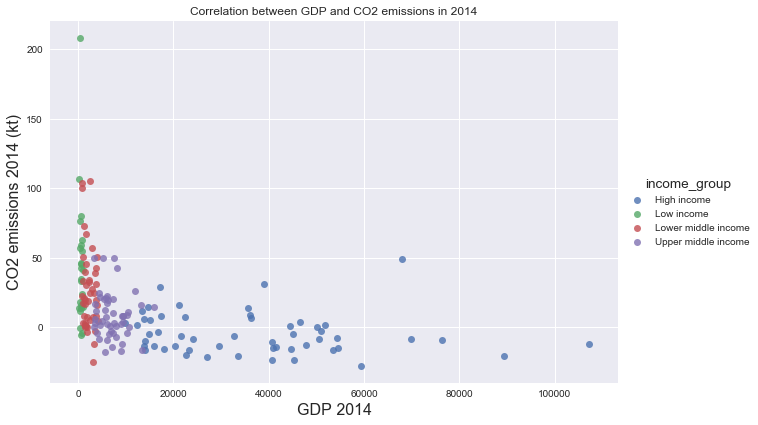

In [25]:
# Show plot again with hue = income group

sns.set(rc={"font.size":16,"axes.labelsize":16})
p = sns.lmplot(x='gdp_2014', y='change(%)', hue = 'income_group', fit_reg= False, data=df_co21, size=6, aspect = 1.5)
p = (p.set_axis_labels('GDP 2014', 'CO2 emissions 2014 (kt)'))
plt.title('Correlation between GDP and CO2 emissions in 2014')

plt.show()

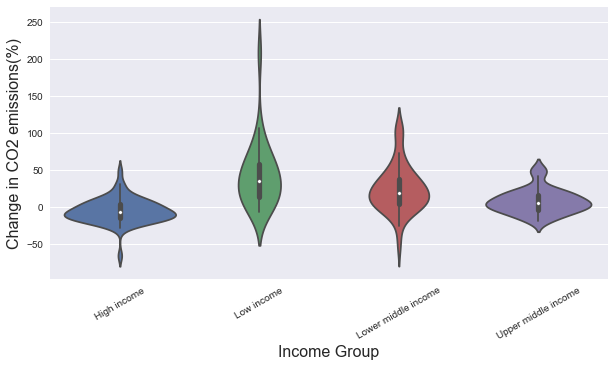

In [26]:
# Toon spreiding trend in CO2 uitstoor per inkomensgroep
fig, ax = plt.subplots(figsize=(10,5))
sns.set(rc={"font.size":16,"axes.labelsize":16})
#p = sns.swarmplot(x= 'income_group', y= 'change(%)', alpha=.4, color='black', data = df_co21)
p = sns.violinplot(ax=ax, x= 'income_group', y= 'change(%)', data = df_co21)
ax.set(xlabel= 'Income Group', ylabel='Change in CO2 emissions(%)')
p.set_xticklabels(p.get_xticklabels(), rotation=30)
plt.show()

## Vraag 3: Kun je (dmv visualisatie) een verband ontdekken tussen CO2 emissies en het percentage energie opgewekt uit hernieuwbare bronnen?

### Inladen & preprocessing van CO2 emissies dataset

In [27]:
#Inladen van CO2 emissions dataset (Worldbank)
df_co2_worldbank = wb.download(indicator='EN.ATM.CO2E.KT', country=['all'], start=2010, end=2014)
df_co2_worldbank = df_co2_worldbank.rename(columns={'EN.ATM.CO2E.KT': 'emission'})

In [28]:
#Data preprocessing
df_co2_worldbank.index
df_co2_worldbank = df_co2_worldbank.reset_index(level=['year'])
df_co2_worldbank['year'] = pd.to_numeric(df_co2_worldbank['year'])
df_co2_worldbank.columns = ['year', 'emission']

#Omdraaien van de assen
df_co2_worldbank = df_co2_worldbank.pivot(columns='year', values='emission')

#Aanpassen kolomnaam 2014 naar co2 emissies 2014
df_co2_worldbank = df_co2_worldbank.rename(columns={2014: 'co2 emissies 2014'})

### Inladen & preprocessing van renewable energy dataset

In [29]:
#Inladen van renewable energy dataset (Worldbank)
df_renewable = wb.download(indicator='EG.FEC.RNEW.ZS', country=['all'], start=2010, end=2014)
df_renewable = df_renewable.rename(columns={'EG.FEC.RNEW.ZS': 'renewable'})

In [30]:
#Data preprocessing
df_renewable.index
df_renewable = df_renewable.reset_index(level=['year'])
df_renewable['year'] = pd.to_numeric(df_renewable['year'])
df_renewable.columns = ['year', 'renewable']

#Omdraaien van de assen
df_renewable = df_renewable.pivot(columns='year', values='renewable')

#Aanpassen kolomnaam 2014 naar renewable 2014
df_renewable = df_renewable.rename(columns={2014: 'renewable 2014'})

### Combineren van de twee datasets

In [31]:
# Concatenate de twee tabellen (gebeurt automatisch op index)
df_combined = pd.concat([df_co2_worldbank, df_renewable], axis=1)

### Grafiek

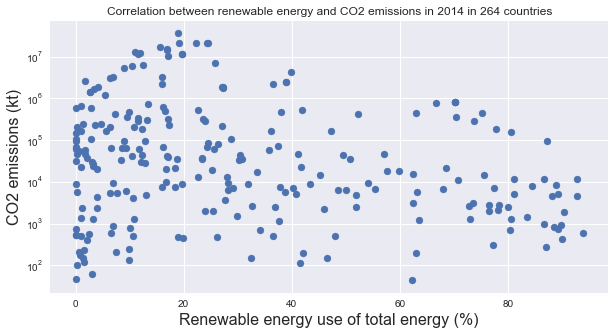

In [32]:
#Grafiek genereren
fig0, axes = plt.subplots(1, 1, figsize=(10,5))
axes.scatter(df_renewable['renewable 2014'], df_co2_worldbank['co2 emissies 2014'])
axes.set_xlabel('Renewable energy use of total energy (%)')
axes.set_ylabel('CO2 emissions (kt)')
axes.set_title('Correlation between renewable energy and CO2 emissions in 2014 in 264 countries')
#Instellen van y-as scale
axes.set_yscale('log')

### Antwoord:
- Er is niet een duidelijk verband tussen CO2 emissies en het percentage energie opgewekt uit hernieuwbare bronnen in 2014




## (Vraag 3 Optioneel)
- Analyse van verband tussen trend van stijging/daling van CO2 emissies in de periode 2010-2014 en het percentage energie opgewekt uit hernieuwbare bronnen in 2014

In [39]:
# Make column from index 
df_combined = df_combined.reset_index()
df_combined.rename(columns={'index':'country'}, inplace=True)
df_combined.head()

year         country        2010        2011        2012        2013  \
0        Afghanistan    8463.436   12240.446   10755.311   10014.577   
1            Albania    4598.418    5240.143    4910.113    5064.127   
2            Algeria  119177.500  121187.016  129987.816  134465.223   
3     American Samoa         NaN         NaN         NaN         NaN   
4            Andorra     517.047     491.378     487.711     476.710   

year  co2 emissies 2014       2010       2011       2012       2013  \
0              9809.225  14.839809  10.793828  13.973584  14.278454   
1              5716.853  37.115330  35.962531  40.048297  41.288978   
2            145400.217   0.257198   0.179944   0.193123   0.144519   
3                   NaN   0.000000   0.000000   0.702427   0.703140   
4               462.042  19.090727  18.971541  19.195534  19.563701   

year  renewable 2014  
0          16.748996  
1          38.689497  
2           0.068775  
3           0.700882  
4          19.886327

In [40]:
# Verwijder onbruikbare kolommen
df_combined = df_combined.drop(columns=[2010,2011,2012,2013, 'co2 emissies 2014'])
df_combined.head()

year         country  renewable 2014
0        Afghanistan       16.748996
1            Albania       38.689497
2            Algeria        0.068775
3     American Samoa        0.700882
4            Andorra       19.886327

In [41]:
# Maak een nieuw dataframe met alle kolommen van 2014
df_energy = pd.merge(df_co21, df_combined)
df_energy.head()

country                     region         income_group      gdp_2014  \
0        Aruba  Latin America & Caribbean          High income           NaN   
1  Afghanistan                 South Asia           Low income    630.320014   
2       Angola         Sub-Saharan Africa  Lower middle income   3747.568360   
3      Albania      Europe & Central Asia  Upper middle income   4413.561583   
4      Andorra      Europe & Central Asia          High income  40785.049228   

   co2_emission_2014  change(%)  renewable 2014  
0            872.746 -65.204678        6.922234  
1           9809.225  15.901213       16.748996  
2          34763.160  19.636547       50.797466  
3           5716.853  24.322169       38.689497  
4            462.042 -10.638298       19.886327

### Grafiek

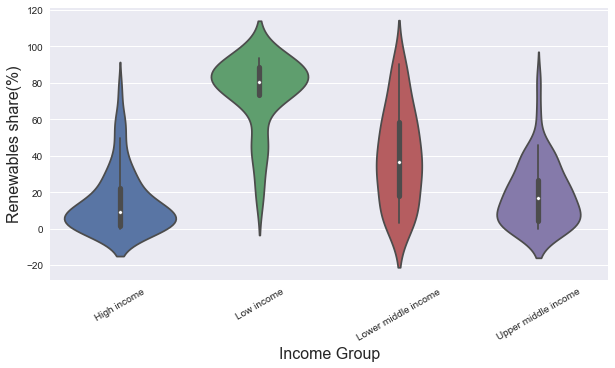

In [42]:
# Plot met spreiding aandeel duurzame energie per inkomensgroep

fig, ax = plt.subplots(figsize=(10,5))
sns.set(rc={"font.size":16,"axes.labelsize":16})
#p = sns.swarmplot(x= 'income_group', y= 'renewable 2014', alpha=.4, color='black', data = df_energy)
p = sns.violinplot(x= 'income_group', y= 'renewable 2014', data = df_energy)
p.set_xticklabels(p.get_xticklabels(), rotation=30)

ax.set(xlabel= 'Income Group', ylabel='Renewables share(%)')
p.set_xticklabels(p.get_xticklabels(), rotation=30)
plt.show()

plt.show()

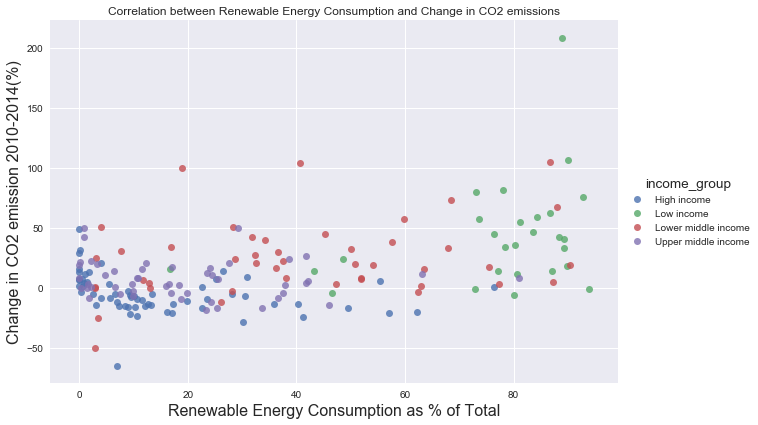

In [43]:
# Scatterplot met correlatie Aandeel duurzame energie en Verandering in CO2 uitstoot
sns.set(rc={"font.size":16,"axes.labelsize":16})
p =  sns.lmplot(x='renewable 2014', y='change(%)', hue = 'income_group', fit_reg= False, data=df_energy, size=6, aspect = 1.5)
p = (p.set_axis_labels('Renewable Energy Consumption as % of Total', 'Change in CO2 emission 2010-2014(%)'))
plt.title('Correlation between Renewable Energy Consumption and Change in CO2 emissions')

plt.show()


In [44]:
# Filter twee middelste inkomensgroepen eruit om verschil hoge en lage inkomensgroep te benadrukken
df_energy = df_energy[(df_energy['income_group'] == "High income") | (df_energy['income_group'] == "Low income")]
df_energy.head()

country                      region income_group  \
0                  Aruba   Latin America & Caribbean  High income   
1            Afghanistan                  South Asia   Low income   
4                Andorra       Europe & Central Asia  High income   
6   United Arab Emirates  Middle East & North Africa  High income   
10   Antigua and Barbuda   Latin America & Caribbean  High income   

        gdp_2014  co2_emission_2014  change(%)  renewable 2014  
0            NaN            872.746 -65.204678        6.922234  
1     630.320014           9809.225  15.901213       16.748996  
4   40785.049228            462.042 -10.638298       19.886327  
6   39034.376275         211369.547  31.438409        0.167807  
10  12403.528221            531.715   1.398601        0.000000

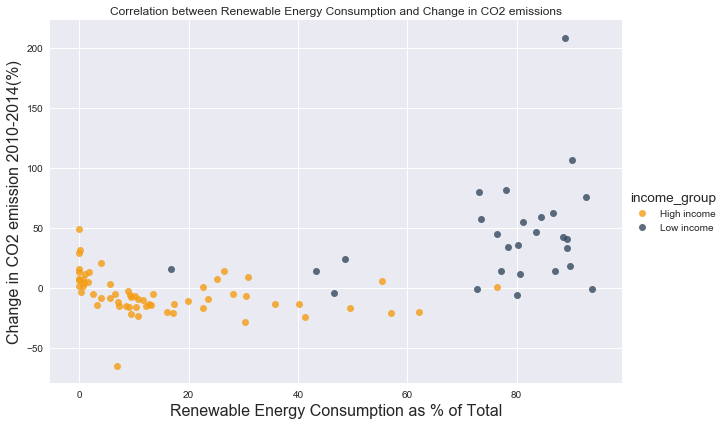

In [45]:
# Toon plot
sns.set(rc={"font.size":16,"axes.labelsize":16})
p =  sns.lmplot(x='renewable 2014', y='change(%)', hue = 'income_group', fit_reg= False, data=df_energy, size=6, aspect = 1.5, 
                palette=sns.color_palette(["#f39c12", "#34495e"]))
p = (p.set_axis_labels('Renewable Energy Consumption as % of Total', 'Change in CO2 emission 2010-2014(%)'))

plt.title('Correlation between Renewable Energy Consumption and Change in CO2 emissions')

plt.show()

### Analyse resultaat:
- Hoge inkomensgroep: Relatief gering aandeel duurzame energie, maar daling of geringe stijging CO2 uitstoot
- Lage inkomensgroep: Relatief groot aandeel duurzame energie, maar relatief sterke stijging CO2 uitstoot

## Vraag 4: Welke landen gebruiken uberhaubt het meeste energie per persoon? En welke het minst?

### Inladen van data & preprocessing

In [33]:
#Inladen energy per capita dataset (Worldbank)
df_energy_capita = wb.download(indicator='EG.USE.PCAP.KG.OE', country=['all'], start=2010, end=2014)
df_energy_capita = df_energy_capita.rename(columns={'EG.USE.PCAP.KG.OE': 'capita'})

In [34]:
#Data preprocessing
df_energy_capita.index
df_energy_capita = df_energy_capita.reset_index(level=['year'])
df_energy_capita['year'] = pd.to_numeric(df_energy_capita['year'])
df_energy_capita.columns = ['year', 'capita']

#Omdraaien van de assen
df_energy_capita = df_energy_capita.pivot(columns='year', values='capita')

### Landen die de meeste energie per persoon gebruiken

In [35]:
#Sorteren van landen met CO2 emissies van hoog naar laag
df_energy_capita_max = df_energy_capita.sort_values(2014, ascending=False)

#Selecteer 5 landen met de grootste emissies
df_energy_capita_max_top = df_energy_capita_max.head()

#### Grafiek

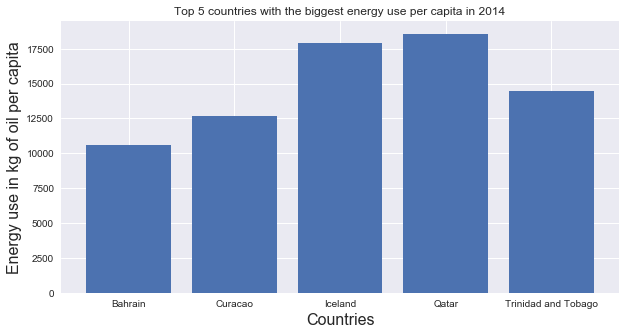

In [36]:
#Grafiek genereren
fig1, axes = plt.subplots(1, 1, figsize=(10,5))
axes.bar(df_energy_capita_max_top.index, df_energy_capita_max_top[2014])
axes.set_xlabel('Countries')
axes.set_ylabel('Energy use in kg of oil per capita')
axes.set_title('Top 5 countries with the biggest energy use per capita in 2014')
plt.show()

### Landen die de minste energie per persoon gebruiken

In [37]:
#Sorteren van landen met CO2 emissies van laag naar hoog
df_energy_capita_min = df_energy_capita.sort_values(2014, ascending=True)

#Selecteer 5 landen met de kleinste emissies
df_energy_capita_min_top = df_energy_capita_min.head()

### Grafiek

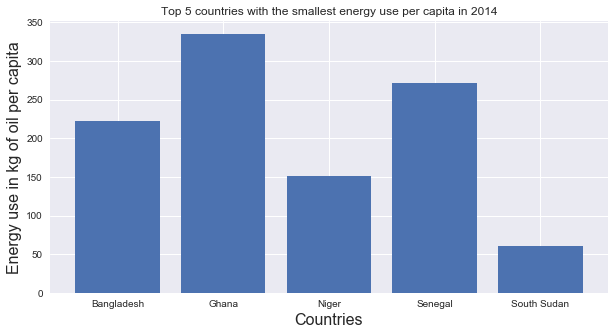

In [38]:
#Grafiek genereren
fig2, axes = plt.subplots(1, 1, figsize=(10,5))
axes.bar(df_energy_capita_min_top.index, df_energy_capita_min_top[2014])
axes.set_xlabel('Countries')
axes.set_ylabel('Energy use in kg of oil per capita')
axes.set_title('Top 5 countries with the smallest energy use per capita in 2014')
plt.show()

### Antwoord: 
- De top 5 landen die in 2014 de meeste energie per persoon gebruiken zijn: Qatar, Ijsland, Trinidad en Tobago, Curacao en Bahrein
- De top 5 landen die in 2014 de minste energie per persoon gebruiken zijn: Zuid-Soedan, Niger, Bangladesh, Senegal en Ghana